<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Exploring SVMs Using Sklearn


---

In [16]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, linear_model, datasets
from sklearn.model_selection import cross_val_score
import seaborn as sns
import pandas as pd

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1. Load the handwritten digits dataset.

In [2]:
digits = datasets.load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

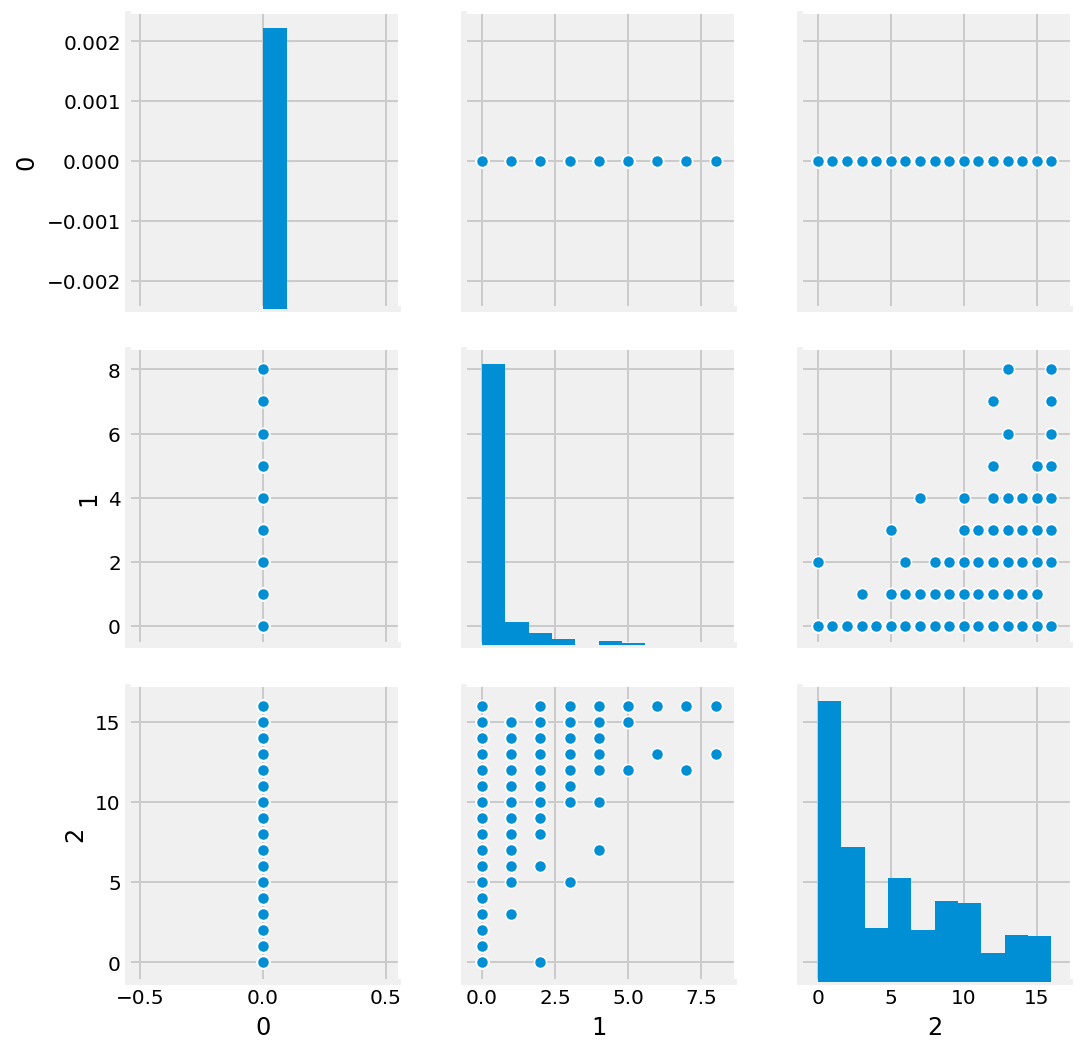

In [17]:
sns.pairplot(pd.DataFrame(X).loc[:,:2])

1797
64


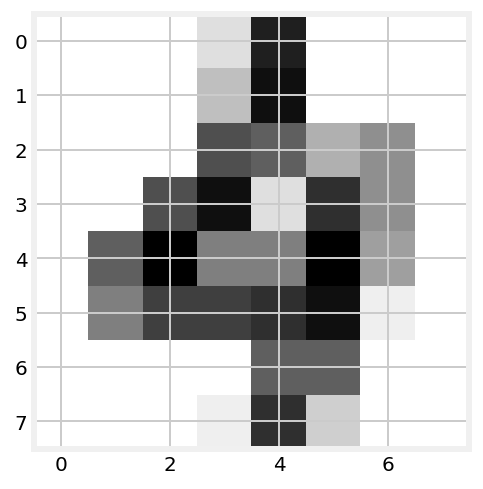

In [3]:
print(len(digits.data))      # 1,797 observations
print(len(digits.data[0]))   # 8 x 8 pixel image

# the number 9
plt.imshow(digits.images[-20], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [4]:
digits.target[-20]

4

In [7]:
X,y=digits.data,digits.target

### 2. Cross-validate a logistic regression on the data.

In [9]:
# A:
logistic=linear_model.LogisticRegression()
scores=cross_val_score(logistic,X,y,cv=5,scoring='accuracy')
print(scores)
scores.mean()

[0.92307692 0.88121547 0.94986072 0.95798319 0.89295775]


0.9210188113360701

### 3. Cross-validate a SVM on the data.

Hint: Check what is the default kernel used. Try some of the alternatives.

In [12]:
clf = svm.SVC()
scores=cross_val_score(clf,X,y,cv=5,scoring='accuracy')
print(scores)
scores.mean()

[0.43406593 0.40883978 0.41504178 0.48739496 0.49859155]


0.44878680061604637

In [19]:
# A:
clf = svm.SVC(kernel='linear')
scores=cross_val_score(clf,X,y,cv=5,scoring='accuracy')
print(scores)
scores.mean()

[0.96428571 0.92265193 0.96657382 0.96358543 0.92957746]


0.9493348726211526

In [23]:
# A:
clf = svm.SVC(kernel='poly',degree=3)
scores=cross_val_score(clf,X,y,cv=5,scoring='accuracy')
print(scores)
scores.mean()

[0.98351648 0.94475138 0.98050139 0.98879552 0.95211268]


0.9699354903506467

## Gaussian SVM has two parameters, gamma and C

---

### gamma

Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. 

The higher the value of gamma, the more it will try to exactly fit the training data set. That will cause over-fitting problems.
- Small gamma: The model is constrained and can under-fit!  It has high bias and low variance.
- Large gamma: The model tries to capture the shape too well: it can over-fit!  It has low bias and high variance.



### C

`C` is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly. `C` can be thought of as the parameter for the soft margin cost function, which controls the influence of each individual support vector.

- Small C: makes the decision surface smooth and simple, a softer margin can under-fit! Gives high bias and low variance.
- Large C: selects more support vectors: can over-fit! Gives a harder margin, low bias and high variance.

### 4. Fit an SVM modifying the default gamma and C.

In [26]:
1/X.shape[1]

0.015625

In [28]:
# A:
clf = svm.SVC(gamma=.001,C=1)
scores=cross_val_score(clf,X,y,cv=5,scoring='accuracy')
print(scores)
scores.mean()

[0.97527473 0.95027624 0.98328691 0.99159664 0.95774648]


0.9716361987950688

### 5. Gridsearch an optimal gamma with C=1.

In [49]:
np.logspace(-5,2,20)

array([1.00000000e-05, 2.33572147e-05, 5.45559478e-05, 1.27427499e-04,
       2.97635144e-04, 6.95192796e-04, 1.62377674e-03, 3.79269019e-03,
       8.85866790e-03, 2.06913808e-02, 4.83293024e-02, 1.12883789e-01,
       2.63665090e-01, 6.15848211e-01, 1.43844989e+00, 3.35981829e+00,
       7.84759970e+00, 1.83298071e+01, 4.28133240e+01, 1.00000000e+02])

In [48]:
# A:
from sklearn.model_selection import GridSearchCV
clf = svm.SVC(C=1,random_state=42)
param_grid={'gamma':np.logspace(-5,2,20)}
grid=GridSearchCV(clf,param_grid,cv=5,scoring='accuracy')
grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': array([1.00000e-05, 2.33572e-05, 5.45559e-05, 1.27427e-04, 2.97635e-04,
       6.95193e-04, 1.62378e-03, 3.79269e-03, 8.85867e-03, 2.06914e-02,
       4.83293e-02, 1.12884e-01, 2.63665e-01, 6.15848e-01, 1.43845e+00,
       3.35982e+00, 7.84760e+00, 1.83298e+01, 4.28133e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [50]:
# A:
pd.DataFrame(grid.cv_results_)

/Users/wejdan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/wejdan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/wejdan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/wejdan/anaconda3/lib/

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.188194,0.010687,0.033733,0.000804,1e-05,{'gamma': 1e-05},0.890110,0.853591,0.894150,0.935574,...,0.885364,0.030406,8,0.929518,0.919861,0.916551,0.907639,0.925798,0.919873,0.007601
1,0.117468,0.002210,0.028442,0.000461,2.33572e-05,{'gamma': 2.3357214690901213e-05},0.906593,0.895028,0.930362,0.960784,...,0.916528,0.026039,7,0.955338,0.949826,0.947149,0.944444,0.958391,0.951030,0.005150
2,0.080030,0.001541,0.022949,0.000400,5.45559e-05,{'gamma': 5.4555947811685143e-05},0.923077,0.919890,0.963788,0.971989,...,0.935448,0.027818,6,0.967900,0.977003,0.970793,0.965972,0.979196,0.972173,0.005124
3,0.059286,0.003405,0.018188,0.000764,0.000127427,{'gamma': 0.00012742749857031334},0.942308,0.922652,0.969359,0.983193,...,0.947691,0.024815,4,0.982554,0.985366,0.985396,0.986806,0.987517,0.985528,0.001702
4,0.048888,0.000698,0.014980,0.000297,0.000297635,{'gamma': 0.00029763514416313193},0.956044,0.933702,0.980501,0.988796,...,0.958820,0.022609,3,0.993719,0.993728,0.993046,0.993750,0.994452,0.993739,0.000445
5,0.058390,0.001050,0.014872,0.000211,0.000695193,{'gamma': 0.0006951927961775605},0.975275,0.944751,0.983287,0.994398,...,0.968837,0.019888,2,0.998604,0.997909,0.998609,0.998611,0.999307,0.998608,0.000442
6,0.106217,0.001347,0.018145,0.000747,0.00162378,{'gamma': 0.001623776739188721},0.967033,0.950276,0.983287,0.991597,...,0.969950,0.015419,1,1.000000,0.999303,0.999305,0.999306,1.000000,0.999583,0.000341
7,0.253153,0.002764,0.025020,0.000418,0.00379269,{'gamma': 0.00379269019073225},0.947802,0.895028,0.949861,0.969188,...,0.938787,0.024867,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.289428,0.010540,0.033780,0.002700,0.00885867,{'gamma': 0.008858667904100823},0.706044,0.629834,0.752089,0.778711,...,0.722871,0.052240,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.285817,0.002348,0.033794,0.000326,0.0206914,{'gamma': 0.02069138081114788},0.236264,0.245856,0.261838,0.322129,...,0.272677,0.032488,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [51]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001623776739188721,
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

In [52]:
grid.best_score_

0.9699499165275459

In [53]:
[x['gamma'] for x in df.params.values]

[1e-05,
 5.994842503189409e-05,
 0.00035938136638046257,
 0.0021544346900318843,
 0.01291549665014884,
 0.0774263682681127,
 0.4641588833612782,
 2.782559402207126,
 16.68100537200059,
 100.0]

/Users/wejdan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/wejdan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/wejdan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/wejdan/anaconda3/lib/

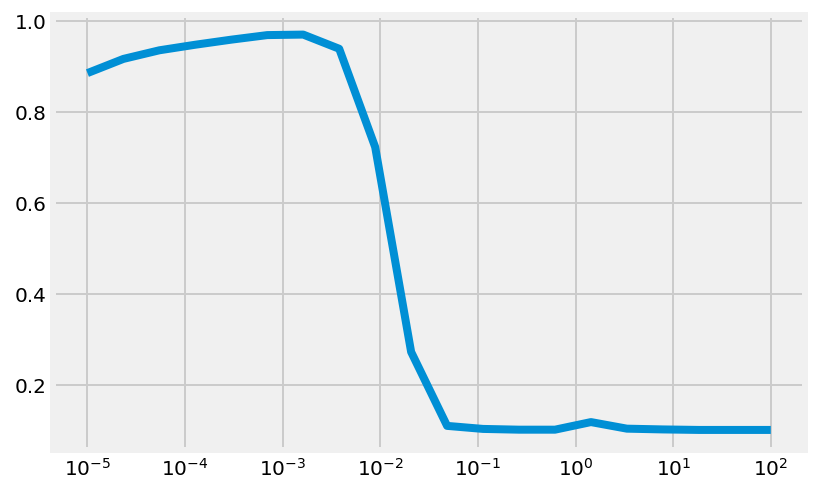

In [54]:
df=pd.DataFrame(grid.cv_results_)
df['g']=[x['gamma'] for x in df.params.values]
plt.plot(df.g,df.mean_test_score)
plt.xscale('log')

### 6. Gridsearch the optimal C, gamma, and kernel.

In [71]:
clf = svm.SVC(C=1,random_state=42)
param_grid = {
           'gamma':np.logspace(-5,5,20),
           'C': np.logspace(-3,3,10),
           'degree':[2,3,4],
           'kernel':['rbf','linear','poly']
           }
grid=GridSearchCV(clf,param_grid,cv=5,scoring='accuracy')
grid.fit(X,y)
print(grid.best_params_)
print(grid.best_score_)

{'C': 10.0, 'degree': 2, 'gamma': 0.000379269019073225, 'kernel': 'rbf'}
0.9738452977184195


### 7. Import the iris dataset.

In [72]:
iris = datasets.load_iris()
iris_X = iris.data[:, :2]  # we only take the first two features. 
iris_y = iris.target

### 8. Cross-validate a default logistic regression and default SVM on the iris data.

In [12]:
# A:

### 9. [Bonus] Compare three SVMs with different kernels on the iris data visually.
- Gaussian
- Linear
- Poly of degree 3

Hint: For visual comparison, use only two of the iris features, e.g. sepal length and sepal width.

In [13]:
# A:

### 10. [Bonus] Compare SVM kernels visually on generated data using sklearn's `make_circles`.

Load `make_circles` from here:
```python
from sklearn.datasets import make_circles
```

Compare the linear, rbf, and poly kernels.

In [14]:
# A: